<a href="https://colab.research.google.com/github/tiff03/Plant-Growth-and-Water-Usage-Data-Analysis/blob/main/Simulated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Data
---
Taking in simulated raw data and cleaning it so it outputs water usage per day

plant name: length_I, length_D, length_M, length_L


tomato: 15, 30, 28, 17

##Initial Phase: 15 days

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from time import time, ctime
from time import struct_time
import datetime
import random
import pandas as pd
from tabulate import tabulate
import csv
from csv import writer
from google.colab import drive

tomato_stage_data = [15, 30, 28, 17]
head = ["time stamp", "event", "sensor ID", "water reserve (mm)", "volume (mm)"]

Stage I (Initial)

In [2]:
from sys import path_importer_cache
path_I = '/content/drive/My Drive/SUMMER 22/intern/I_data/I_simulated_data.csv'

minute_interval = 5 #how many minutes between each sensor read
sensor_ID = "1"
water_reserve = 10 #how much water initially in the reserve
days_since_water = 2 #days since plant has been watered - set at 2 so it waters first day
irrigation_volume = 0 
IR = 0
watered = False
water_time = 9 #what time to water the plants at
all_data = []
IR_data_point = []


today = datetime.datetime(2022, 5, 19)  #first day 5/19

end_time = today

#elapse time every 5 minutes
for t in range(tomato_stage_data[0]):       #I stage
  
  watered = False

  for h in range(24):
    time_now = end_time.time() 

    if(time_now.hour % 6 == 0):
      water_reserve -= 0.25

    for m in range(60//minute_interval):

      if(not watered and (time_now.hour == water_time and time_now.minute == 0)):
        irrigation_volume = random.randint(1,3)
        water_reserve += irrigation_volume
        watered = True
        IR_data_point = [end_time.strftime("%m/%d/%Y %H:%M:%S"), "IR", None, None, irrigation_volume]
        all_data.append(IR_data_point)

      data_point = [end_time.strftime("%m/%d/%Y %H:%M:%S"), "sensor", sensor_ID, water_reserve, None]
      all_data.append(data_point)
      end_time += datetime.timedelta(minutes = minute_interval)
      
      irrigation_volume = 0
      

with open(path_I, 'w') as file:
  writer = csv.writer(file)

  writer.writerow(head)
  
  for point in all_data:
    writer.writerow(point)

In [3]:
dataset = pd.read_csv(path_I)

dataset["sensor ID"] = dataset["sensor ID"].astype(object)

#raw simulated dataFrame
dataset

,time stamp,event,sensor ID,water reserve (mm),volume (mm)
0,05/19/2022 00:00:00,sensor,1.0,9.75,NaN
1,05/19/2022 00:05:00,sensor,1.0,9.75,NaN
2,05/19/2022 00:10:00,sensor,1.0,9.75,NaN
3,05/19/2022 00:15:00,sensor,1.0,9.75,NaN
4,05/19/2022 00:20:00,sensor,1.0,9.75,NaN
...,...,...,...,...,...
4330,06/02/2022 23:35:00,sensor,1.0,27.00,NaN
4331,06/02/2022 23:40:00,sensor,1.0,27.00,NaN
4332,06/02/2022 23:45:00,sensor,1.0,27.00,NaN
4333,06/02/2022 23:50:00,sensor,1.0,27.00,NaN


In [4]:
#create two different dataFrames one of the Irrigation event and the other of the sensor event

numeric_columns = list(dataset.select_dtypes(include=['float64']).columns)
def_columns = list(dataset.select_dtypes(include=['object']).columns)

print('Numerical Columns: ',numeric_columns)
print('Defining Columns: ',def_columns)

irrigation_I = dataset[dataset['event'] == 'IR']
sensor_I = dataset[dataset['event'] == 'sensor']

irrigation_I = irrigation_I.set_index(pd.Index(list(range(len(irrigation_I)))))
sensor_I = sensor_I.set_index(pd.Index(list(range(len(sensor_I)))))

print('irrigation: ', irrigation_I)
print('sensor: ', sensor_I)

Numerical Columns:  ['water reserve (mm)', 'volume (mm)']
Defining Columns:  ['time stamp', 'event', 'sensor ID']
irrigation:               time stamp event sensor ID  water reserve (mm)  volume (mm)
0   05/19/2022 09:00:00    IR       NaN                 NaN          2.0
1   05/20/2022 09:00:00    IR       NaN                 NaN          3.0
2   05/21/2022 09:00:00    IR       NaN                 NaN          2.0
3   05/22/2022 09:00:00    IR       NaN                 NaN          3.0
4   05/23/2022 09:00:00    IR       NaN                 NaN          1.0
5   05/24/2022 09:00:00    IR       NaN                 NaN          1.0
6   05/25/2022 09:00:00    IR       NaN                 NaN          2.0
7   05/26/2022 09:00:00    IR       NaN                 NaN          2.0
8   05/27/2022 09:00:00    IR       NaN                 NaN          3.0
9   05/28/2022 09:00:00    IR       NaN                 NaN          2.0
10  05/29/2022 09:00:00    IR       NaN                 NaN          2

Graph for Stage I


---


usage per 5 minutes

In [5]:
time_x = []
usage_y = []
previous_point_index = None
ir = 0
x = 0

for i in range(len(dataset['time stamp'])):
  if(dataset['event'][i] == 'IR'):
    ir = dataset['volume (mm)'][i]

  if(dataset['water reserve (mm)'][i] != None and previous_point_index != None): 
    usage_y.append(dataset['water reserve (mm)'][i] - dataset['water reserve (mm)'][previous_point_index] - ir)
    time_x.append(dataset['time stamp'][i])
    ir = 0
    x += 1
    
  previous_point_index = i
  
x = [i for i in range(x)]

plt.figure(figsize=(150,100))
plt.title("Water Usage over Time for Stage I", fontsize=300)
plt.xlabel('Time', fontsize=100)
plt.ylabel('Water Usage (mm)', fontsize=100)

plt.tick_params(axis='x', labelsize=80)
plt.tick_params(axis='y', labelsize=80)

default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, time_x, fontsize = 80)
plt.scatter(default_x_ticks, usage_y, s = 1000)


Graph for Stage I


---
usage per day



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

time_x = []
usage_y = []
IR_index = 0
interval = 24
start_time = '05/19/2022 00:00:00'
first = 0
second = 0

#find the start time
first = sensor_I.loc[sensor_I['time stamp'] == start_time] #dataframe object
first_index = int(sensor_I[sensor_I['time stamp']== first['time stamp'][0]].index.values)
first_water_reserve = 0
second_water_reserve = first['water reserve (mm)'][0]

for i in range(first_index, len(sensor_I), interval * 60 // 5):
  if(first_water_reserve != 0):
    second_water_reserve = sensor_I['water reserve (mm)'][i]
    IR = irrigation_I['volume (mm)'][IR_index]
    value = second_water_reserve - first_water_reserve - IR
    usage_y.append(value)
    time_x.append(sensor_I['time stamp'][i])
    IR_index+=1

  first_water_reserve = second_water_reserve


plt.figure(figsize=(150,100))
plt.title("Water Usage over Time for Stage I", fontsize=300)
plt.xlabel('Time', fontsize=100)
plt.ylabel('Water Usage (mm)', fontsize=100)

plt.tick_params(axis='x', labelsize=80)
plt.tick_params(axis='y', labelsize=80)


#plt.xticks(default_x_ticks, time_x, fontsize = 80)
default_x_ticks = range(len(time_x))

slope, intercept, r_value, p_value, std_err = stats.linregress(default_x_ticks, usage_y)

line = slope * default_x_ticks + intercept
plt.plot(default_x_ticks, line, 'r', linewidth=10, label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xticks(default_x_ticks, time_x, fontsize = 80)
plt.scatter(default_x_ticks, usage_y, s = 1000)
plt.legend(fontsize=100)
plt.show()

Create new cleaned dataFrame


---

data of and then water usage for that day (24 hours)



In [7]:
#14 points because although 15 days but since difference it is only 14
days = [x for x in range(1, len(time_x) + 1)]

d = {'time stamp': time_x, 'days': days, 'water usage per day (mm)': usage_y}

clean_dataset = pd.DataFrame(d)

clean_dataset.to_csv('I_clean_dataset.csv')  

clean_dataset

,time stamp,days,water usage per day (mm)
0,05/20/2022 00:00:00,1,-1.0
1,05/21/2022 00:00:00,2,-1.0
2,05/22/2022 00:00:00,3,-1.0
3,05/23/2022 00:00:00,4,-1.0
4,05/24/2022 00:00:00,5,-1.0
5,05/25/2022 00:00:00,6,-1.0
6,05/26/2022 00:00:00,7,-1.0
7,05/27/2022 00:00:00,8,-1.0
8,05/28/2022 00:00:00,9,-1.0
9,05/29/2022 00:00:00,10,-1.0


In [8]:
clean_dataset.describe()

,days,water usage per day (mm)
count,14.0000,14.0
mean,7.5000,-1.0
std,4.1833,0.0
min,1.0000,-1.0
25%,4.2500,-1.0
50%,7.5000,-1.0
75%,10.7500,-1.0
max,14.0000,-1.0


In [9]:
import numpy as np

x = clean_dataset.loc[:, 'days']
y = clean_dataset.loc[:, 'water usage per day (mm)']

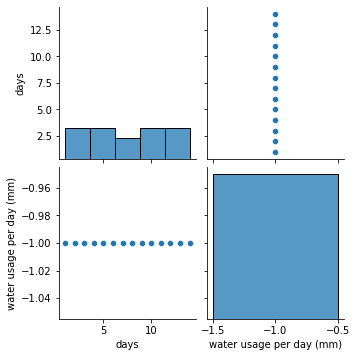

In [10]:
import seaborn as sns

copy2 = clean_dataset.copy()

sns.pairplot(copy2)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in clean_dataset.columns.tolist()[1:]:
    feature_data = clean_dataset[i].values.reshape(-1, 1)
    scaler.fit(feature_data)
    clean_dataset[i] = scaler.transform(feature_data)

clean_dataset.head()

,time stamp,days,water usage per day (mm)
0,05/20/2022 00:00:00,-1.612452,0.0
1,05/21/2022 00:00:00,-1.364382,0.0
2,05/22/2022 00:00:00,-1.116313,0.0
3,05/23/2022 00:00:00,-0.868243,0.0
4,05/24/2022 00:00:00,-0.620174,0.0


Linear Regression attempt

In [12]:
from sklearn.linear_model import LinearRegression

default_x_ticks = np.array(default_x_ticks)
default_x_ticks = default_x_ticks.reshape(-1,1)

model = LinearRegression()

model.fit(default_x_ticks, usage_y)

r_sq = model.score(default_x_ticks, usage_y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

usage_y = np.array(usage_y)

new_model = LinearRegression().fit(default_x_ticks, usage_y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

print(f"slope: {new_model.coef_}")


y_pred = model.predict(default_x_ticks)
print(f"predicted response:\n{y_pred}")
y_pred = model.intercept_ + model.coef_ * default_x_ticks
print(f"predicted response:\n{y_pred}")

x_new = np.arange(5).reshape((-1, 1))
print(x_new)


y_new = model.predict(x_new)
print(y_new)

coefficient of determination: 1.0
intercept: -1.0
slope: [0.]
intercept: [-1.]
slope: [[0.]]
predicted response:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
predicted response:
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[0]
 [1]
 [2]
 [3]
 [4]]
[-1. -1. -1. -1. -1.]


Adding noise to previous data

---



In [13]:
mu, sigma = 0, 1.1 
number_of_rows = len(dataset)

noise = np.around(np.random.normal(mu, sigma, [number_of_rows, 1]), 2)

for i in range(len(dataset['water reserve (mm)'])):
  if(dataset['water reserve (mm)'][i] != np.nan):
    if(noise[i] > 0):
      dataset['water reserve (mm)'][i] -= noise[i]

    if(noise[i] < 0):
      dataset['water reserve (mm)'][i] += noise[i]

  else:
    break


irrigation = dataset[dataset['event'] == 'IR']
sensor = dataset[dataset['event'] == 'sensor']

irrigation = irrigation.set_index(pd.Index(list(range(len(irrigation)))))
sensor = sensor.set_index(pd.Index(list(range(len(sensor)))))

print('irrigation: ', irrigation)
print('sensor: ', sensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


irrigation:               time stamp event sensor ID  water reserve (mm)  volume (mm)
0   05/19/2022 09:00:00    IR       NaN                 NaN          2.0
1   05/20/2022 09:00:00    IR       NaN                 NaN          3.0
2   05/21/2022 09:00:00    IR       NaN                 NaN          2.0
3   05/22/2022 09:00:00    IR       NaN                 NaN          3.0
4   05/23/2022 09:00:00    IR       NaN                 NaN          1.0
5   05/24/2022 09:00:00    IR       NaN                 NaN          1.0
6   05/25/2022 09:00:00    IR       NaN                 NaN          2.0
7   05/26/2022 09:00:00    IR       NaN                 NaN          2.0
8   05/27/2022 09:00:00    IR       NaN                 NaN          3.0
9   05/28/2022 09:00:00    IR       NaN                 NaN          2.0
10  05/29/2022 09:00:00    IR       NaN                 NaN          2.0
11  05/30/2022 09:00:00    IR       NaN                 NaN          2.0
12  05/31/2022 09:00:00    IR       Na

In [14]:
time_x = []
usage_y = []
IR_index = 0
interval = 24
start_time = '05/19/2022 00:00:00'
first = 0
second = 0

#find the start time
first = sensor.loc[sensor['time stamp'] == start_time] #dataframe object
first_index = int(sensor[sensor['time stamp']== first['time stamp'][0]].index.values)
first_water_reserve = 0
second_water_reserve = first['water reserve (mm)'][0]

for i in range(first_index, len(sensor), interval * 60 // 5):
  if(first_water_reserve != 0):
    second_water_reserve = sensor['water reserve (mm)'][i]
    IR = irrigation['volume (mm)'][IR_index]
    value = second_water_reserve - first_water_reserve - IR
    usage_y.append(value)
    time_x.append(sensor['time stamp'][i])
    IR_index+=1

  first_water_reserve = second_water_reserve


plt.figure(figsize=(150,100))
plt.title("Water Usage over Time for Stage I", fontsize=300)
plt.xlabel('Time', fontsize=100)
plt.ylabel('Water Usage (mm)', fontsize=100)

plt.tick_params(axis='x', labelsize=80)
plt.tick_params(axis='y', labelsize=80)


#plt.xticks(default_x_ticks, time_x, fontsize = 80)
default_x_ticks = range(len(time_x))
plt.xticks(default_x_ticks, time_x, fontsize = 80)
plt.scatter(default_x_ticks, usage_y, s = 1000)

##Development Phase 30 days

In [15]:
path_D = '/content/drive/My Drive/SUMMER 22/intern/D_data/D_simulated_data.csv'

minute_interval = 5 #how many minutes between each sensor read
sensor_ID = "1"
irrigation_volume = 0
IR = 0
water_time = 9 #what time to water the plants at
watered = False
all_data = []
IR_data_point = []

water_reserve = dataset.iloc[[-1]]['water reserve (mm)'].values[0]
today = dataset.iloc[[-1]]['time stamp'].values[0]

today = datetime.datetime.strptime(today, "%m/%d/%Y %H:%M:%S")

water_loss = 0.25
IR_min = 1
IR_max = 2

end_time = today + datetime.timedelta(minutes=5)

#elapse time every 5 minutes
for t in range(tomato_stage_data[1]):       #D stage

  watered = False

  for h in range(24):
    time_now = end_time.time()

    if(time_now.hour % 6 == 0 and time_now.minute == 0):
        water_reserve -= water_loss

    for m in range(60//minute_interval):

      if(not watered and (time_now.minute == 00 and time_now.hour == water_time)):
        irrigation_volume = random.randint(IR_min, IR_max)
        water_reserve += irrigation_volume
        watered = True
        IR_data_point = [end_time.strftime("%m/%d/%Y %H:%M:%S"), "IR", None, None, irrigation_volume]
        all_data.append(IR_data_point)
        IR_min += 1
        IR_max += 1

      data_point = [end_time.strftime("%m/%d/%Y %H:%M:%S"), "sensor", sensor_ID, water_reserve, None]
      all_data.append(data_point)
      end_time += datetime.timedelta(minutes = minute_interval)
      
      irrigation_volume = 0

  water_loss += 0.125

with open(path_D, 'w') as file:
  writer = csv.writer(file)

  writer.writerow(head)
  
  for point in all_data:
    writer.writerow(point)

In [16]:
dataset_D = pd.read_csv(path_D)

dataset_D["sensor ID"] = dataset_D["sensor ID"].astype(object)

#raw simulated dataFrame
dataset_D

#figure out why its losing so much..

,time stamp,event,sensor ID,water reserve (mm),volume (mm)
0,06/03/2022 00:00:00,sensor,1.0,25.44,NaN
1,06/03/2022 00:05:00,sensor,1.0,25.44,NaN
2,06/03/2022 00:10:00,sensor,1.0,25.44,NaN
3,06/03/2022 00:15:00,sensor,1.0,25.44,NaN
4,06/03/2022 00:20:00,sensor,1.0,25.44,NaN
...,...,...,...,...,...
8665,07/02/2022 23:35:00,sensor,1.0,260.19,NaN
8666,07/02/2022 23:40:00,sensor,1.0,260.19,NaN
8667,07/02/2022 23:45:00,sensor,1.0,260.19,NaN
8668,07/02/2022 23:50:00,sensor,1.0,260.19,NaN


In [17]:
#create two different dataFrames one of the Irrigation event and the other of the sensor event

numeric_columns = list(dataset_D.select_dtypes(include=['float64']).columns)
def_columns = list(dataset_D.select_dtypes(include=['object']).columns)

print('Numerical Columns: ',numeric_columns)
print('Defining Columns: ',def_columns)

irrigation_D = dataset_D[dataset_D['event'] == 'IR']
sensor_D = dataset_D[dataset_D['event'] == 'sensor']

irrigation_D = irrigation_D.set_index(pd.Index(list(range(len(irrigation_D)))))
sensor_D = sensor_D.set_index(pd.Index(list(range(len(sensor_D)))))

print('irrigation: ', irrigation_D)
print('sensor: ', sensor_D)

Numerical Columns:  ['water reserve (mm)', 'volume (mm)']
Defining Columns:  ['time stamp', 'event', 'sensor ID']
irrigation:               time stamp event sensor ID  water reserve (mm)  volume (mm)
0   06/03/2022 09:00:00    IR       NaN                 NaN          1.0
1   06/04/2022 09:00:00    IR       NaN                 NaN          3.0
2   06/05/2022 09:00:00    IR       NaN                 NaN          4.0
3   06/06/2022 09:00:00    IR       NaN                 NaN          4.0
4   06/07/2022 09:00:00    IR       NaN                 NaN          6.0
5   06/08/2022 09:00:00    IR       NaN                 NaN          7.0
6   06/09/2022 09:00:00    IR       NaN                 NaN          7.0
7   06/10/2022 09:00:00    IR       NaN                 NaN          9.0
8   06/11/2022 09:00:00    IR       NaN                 NaN          9.0
9   06/12/2022 09:00:00    IR       NaN                 NaN         11.0
10  06/13/2022 09:00:00    IR       NaN                 NaN         11

Graph for Stage D


---


usage per 5 minutes

In [18]:
D_time_x = []
D_usage_y = []
D_previous_point_index = None
D_ir = 0
D_x = 0

for i in range(len(dataset_D['time stamp'])):
  if(dataset_D['event'][i] == 'IR'):
    D_ir = dataset_D['volume (mm)'][i]

  if(dataset_D['water reserve (mm)'][i] != None and D_previous_point_index != None): 
    D_usage_y.append(dataset_D['water reserve (mm)'][i] - dataset_D['water reserve (mm)'][D_previous_point_index] - D_ir)
    D_time_x.append(dataset_D['time stamp'][i])
    D_ir = 0
    D_x += 1
    
  D_previous_point_index = i
  
D_x = [i for i in range(D_x)]

plt.figure(figsize=(150,100))
plt.title("Water Usage over Time for Stage D", fontsize=300)
plt.xlabel('Time', fontsize=100)
plt.ylabel('Water Usage (mm)', fontsize=100)

plt.tick_params(axis='x', labelsize=80)
plt.tick_params(axis='y', labelsize=80)

default_x_ticks = range(len(D_x))
plt.xticks(default_x_ticks, D_time_x, fontsize = 80)
plt.scatter(default_x_ticks, D_usage_y, s = 1000)

Stage D



---



usage per day



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

D_time_x = []
D_usage_y = []
D_IR_index = 0
D_interval = 24
D_start_time = datetime.date(2022, 3, 6)
D_first = 0
D_second = 0

#find the start time
D_first = sensor_D.loc[sensor_D['time stamp'] == D_start_time] #dataframe object
D_first_index = int(sensor_D[sensor_D['time stamp'] == D_first['time stamp'][0]].index.values)
D_first_water_reserve = 0
D_second_water_reserve = D_first['water reserve (mm)'][0]

for i in range(D_first_index, len(sensor_D), D_interval * 60 // 5):
  if(D_first_water_reserve != 0):
    D_second_water_reserve = sensor_D['water reserve (mm)'][i]
    D_IR = irrigation_D['volume (mm)'][D_IR_index]
    D_value = D_second_water_reserve - D_first_water_reserve - D_IR
    D_usage_y.append(D_value)
    D_time_x.append(sensor_D['time stamp'][i])
    D_IR_index+=1

  D_first_water_reserve = D_second_water_reserve


plt.figure(figsize=(150,100))
plt.title("Water Usage over Time for Stage I", fontsize=300)
plt.xlabel('Time', fontsize=100)
plt.ylabel('Water Usage (mm)', fontsize=100)

plt.tick_params(axis='x', labelsize=80)
plt.tick_params(axis='y', labelsize=80)


#plt.xticks(default_x_ticks, time_x, fontsize = 80)
default_x_ticks = range(len(D_time_x))

slope, intercept, r_value, p_value, std_err = stats.linregress(default_x_ticks, D_usage_y)

line = slope * default_x_ticks + intercept
plt.plot(default_x_ticks, line, 'r', linewidth=10, label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xticks(default_x_ticks, time_x, fontsize = 80)
plt.scatter(default_x_ticks, usage_y, s = 1000)
plt.legend(fontsize=100)
plt.show()

Empty DataFrame
Columns: [time stamp, event, sensor ID, water reserve (mm), volume (mm)]
Index: []


KeyError: ignored